# Comparison of Variance of a U-Statistic to other unbiased estimators

Suppose we are interested in the estimation of an expectation functional 
<br><br>$$\theta(F) = \mathbb{\sf E}_F\{h(X_1, \dots, X_m) \},$$<br><br>

for example:

$$ \theta(F) = \mathbb{\sf E}_F\{X \} = \mu (F) = \int x dF(x) $$ <br><br>of an unknown distribution $F$ with $X \sim F$. <br><br>

The U-Statistic corresponding to our example $\mu (F)$([Quantinar link to U-Stat talk here](https://quantinar.com)) is <br><br>$$ \begin{aligned}
U_n =& \frac {1}{\binom{n}{m}} \underset{1 \leq i_1 < i_2 < \dots < i_m \leq n}{\sum \dots \sum} h(X_{i_1}, \dots, X_{i_m})\\
=& n^{-1} \sum_{i = 1}^n X_i = \bar{X},
\end{aligned} 
 $$
 where $X_i \sim F$ i.i.d.

<br><br>
Remember that $U_n$ is unbiased. However, might be other unbiased estimators $S$ of $\theta(F)$. So what can we say about the variances of $U_n$ on one hand and the variances of any such other unbiased estimator $S$ on the other? <br><br>

Examples of simple alternative candidates for unbiased estimators of $\mu (F)$ are 

$$ \begin{aligned} 
S_1 =& X_1 \\
S_2 =& \frac{1}{2} (X_1 + X_n)
\end{aligned}$$

<br><br>

We will compare their variance in a quick simulation study.

## Simulation Study

The setup is $F = \chi ^2 (5)$. We know that $\mu\{\chi ^ 2 (k)\} = k$, such that $\theta(F) = \mu(F) = 5$.

First we simulate 100 samples from $F$, each of size $n = 50$. 

In [ ]:
import numpy as np
df = 5
n = 50
B = 100

samples = [np.random.chisquare(df, size = n) for i in np.arange(B)]

We plot an example of such a sample.

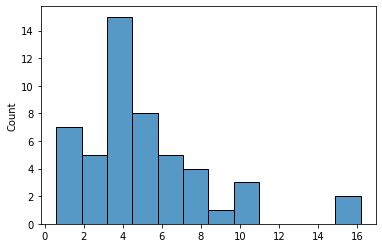

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.histplot(samples[0])

Now we calculate $U_n$, $S_1$ and $S_2$ for every single sample.

In [ ]:
list_Un = [np.mean(sample) for sample in samples]
df_Un = pd.DataFrame(data = {"Estimate" : list_Un, "Estimator" : "Un" })

list_S1 = [sample[0] for sample in samples]
df_S1 = pd.DataFrame(data = {"Estimate" : list_S1, "Estimator" : "S1" })

list_S2 = [0.5*(sample[0] + sample[1]) for sample in samples]
df_S2 = pd.DataFrame(data = {"Estimate" : list_S2, "Estimator" : "S2" })

data_estimators = pd.concat([df_Un, df_S1, df_S2], axis = 0)

Let us take a look at the distributions of $U_n$, $S_1$ and $S_2$.

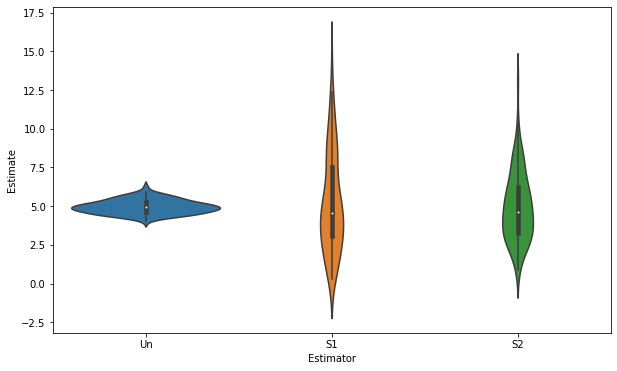

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.violinplot(x="Estimator", y="Estimate", data=data_estimators)

The results are consistent with our expectation. All of the estimators are unbiased, but $U_n$ has the smallest variance. This is consistent with:

### Theorem
For any unbiased statistic ￼$S = S(X_1, \dots, X_n)$ which satisfies $\mathbb{\sf E}_F(S) = \theta = \theta (F)$￼, there exists $U_n$￼ such that ￼$\mathbb{\sf{Var}}_F(U_n) \leq \mathbb{\sf{Var}}_F(S)$ with equality iff ￼$\mathbb{\sf P}_F(U_n = S) = 1$.